In [1]:
# importing typical packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# load data
df = pd.read_csv('Data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# https://www.thepythoncode.com/article/credit-card-fraud-detection-using-sklearn-in-python
# great distributions with seaborn ^^^^

In [5]:
# drop time
# time simply represents the time in seconds since the first transaction in the
# data set. Since this dataset only contains data from transactions that occured
# over two days, it seems very unlikely that this will be meaningful
df = df.drop('Time', axis=1)

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# rename class to fraud so it it more clear
df = df.rename(columns={'Class': 'Fraud'})

In [8]:
# normalize data
col_names = df.columns
values = df.values
scaler = preprocessing.MinMaxScaler()
values_scaled = scaler.fit_transform(values)
df = pd.DataFrame(values_scaled, columns=col_names)

In [9]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518113,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


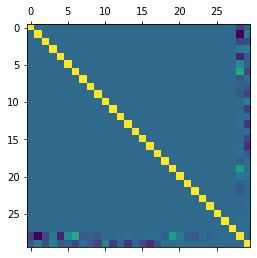

In [11]:
# plot grids to show correlation between features
plt.matshow(df.corr())

looks like as a result of the preprocessing with pca there is no noteable correlation between any of the components other than the amount and our target variable

In [33]:
df.Fraud.value_counts(normalize=True)

0.0    0.998273
1.0    0.001727
Name: Fraud, dtype: float64

## Create baseline logistic regression

In [13]:
# Gets X and y given dataframe
def get_X_y(df):
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']
    return X, y

In [14]:
# Given a dataframe, returns a logistic regression model, X_test split, and y_test split
def train_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return model, X_test, y_test, X_train, y_train

In [44]:
def print_metrics(y, predictions):
    print(f'Accuracy: {accuracy_score(y, predictions)}')
    print(f'Precision: {precision_score(y, predictions)}')
    print(f'Recall: {recall_score(y, predictions)}')
    print(f'F1 Score: {f1_score(y, predictions)}')

In [45]:
# given a logistic regression model, X_test split, and y_test split returns a confusion matrix
# and prints several metrics
def plot_confusion_matrix(model, X_test, y_test, X_train, y_train):
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)

    score = model.score(X_test, y_test)

    confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    title = f'Accuracy Score: {score}'
    plt.title(title, size = 15);
  
    print_metrics(y_test, test_predictions)
    print()
    print_metrics(y_train, train_predictions)

In [46]:
# basic logistic regression
X_base, y_base = get_X_y(df)
model_1, X_test_base, y_test_base, X_train_base, y_train_base = train_logistic_regression(X_base, y_base)
plot_confusion_matrix(model_1, X_test_base, y_test_base, X_train_base, y_train_base)

ValueError: not enough values to unpack (expected 5, got 3)

Accuracy: 0.9989887924496503
Precision: 0.8227848101265823
Recall: 0.5284552845528455
F1 Score: 0.6435643564356436


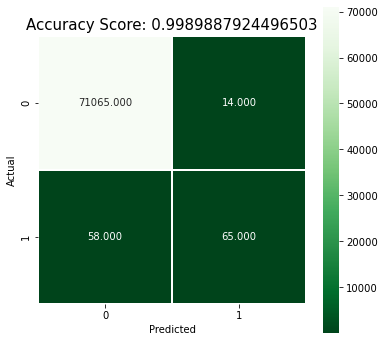

In [16]:
# basic logistic regression
X_base, y_base = get_X_y(df)
model_1, X_test_base, y_test_base = train_logistic_regression(X_base, y_base)
plot_confusion_matrix(model_1, X_test_base, y_test_base)

Here we can see that despite the accuracy (which is certainly a red flag), we are only actually identifying around half of our target cases

## Rerun model after addressing data imbalance

In [17]:
# https://www.researchgate.net/publication/339986048_Methods_of_Handling_Unbalanced_Datasets_in_Credit_Card_Fraud_Detection
# SMOTE (Static or Dynamic)
# Oversampling
# Undersampling
# Hybrid

In [18]:
# seperate transaction types to make sampling easier
fraud = df[df['Fraud'] == 1]
valid = df[df['Fraud'] == 0]
print(fraud.shape)
print(valid.shape)

(492, 30)
(284315, 30)


### Undersampling

In [19]:
valid_sample = valid.sample(n=492)
undersampled_5050 = pd.concat([fraud, valid_sample], axis=0)

Accuracy: 0.9349593495934959
Precision: 1.0
Recall: 0.8699186991869918
F1 Score: 0.9304347826086956


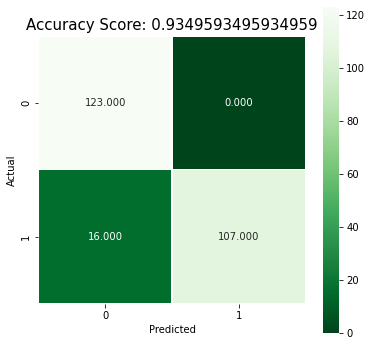

In [20]:
# Logistic regression, undersampled to 1:1
X_under, y_under = get_X_y(undersampled_5050)
model_2, X_test_under, y_test_under = train_logistic_regression(X_under, y_under)
plot_confusion_matrix(model_2, X_test_under, y_test_under)

Accuracy: 0.9973877138282633
Precision: 0.38202247191011235
Recall: 0.8292682926829268
F1 Score: 0.523076923076923


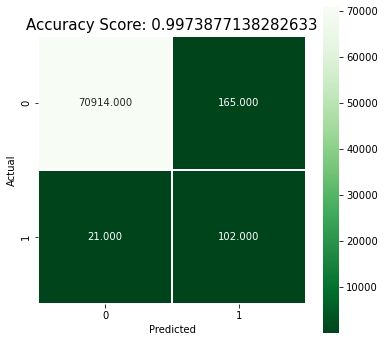

In [21]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_2, X_test_base, y_test_base)

Despite being quite oversimplified, we can see by undersampling the valid transactions so that there is a 1:1 ratio between valid and fraudulent transactions were were able to signifigantly improve the amount of fraudulent transactions we were able to capture in the original unaltered test data

### Oversample

In [22]:
# This cell combines SMOTE oversampling of the minority class with undersampling of the majority class

oversample = SMOTE()
# synthetically upsample fraudulent cases to comprise 10% of dataset
over = SMOTE(sampling_strategy=0.1)
# random sampling to reduce majority class to 50% more than minority class
under = RandomUnderSampler(sampling_strategy=0.5)
smote_over_under = Pipeline([('over', over), ('under', under)])

In [23]:
X_smote, y_smote = smote_over_under.fit_resample(X_base, y_base)

In [24]:
X_smote

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.956136,0.775191,0.838025,0.342073,0.767929,0.262744,0.274835,0.782948,0.417229,0.515034,...,0.585376,0.566355,0.550064,0.666103,0.387729,0.574122,0.405962,0.419615,0.316762,0.006075
1,0.978957,0.764473,0.848372,0.276604,0.763072,0.268279,0.261859,0.786711,0.495184,0.503146,...,0.580769,0.558941,0.495981,0.662802,0.253989,0.603024,0.490436,0.416738,0.313531,0.001640
2,0.939038,0.767059,0.860690,0.341344,0.745384,0.289257,0.286315,0.781038,0.434267,0.509256,...,0.581659,0.564262,0.548426,0.671141,0.386803,0.561951,0.423751,0.419722,0.307756,0.029882
3,0.729787,0.844973,0.614691,0.312136,0.722532,0.250326,0.243320,0.859870,0.559631,0.583210,...,0.592508,0.548451,0.442014,0.656750,0.154058,0.629479,0.359675,0.402575,0.293391,0.003503
4,0.991984,0.746755,0.816463,0.200134,0.755882,0.256982,0.260145,0.783596,0.426153,0.541313,...,0.577586,0.561989,0.533532,0.664038,0.397143,0.586701,0.440381,0.415988,0.312042,0.005858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85288,0.928185,0.780256,0.791927,0.299372,0.758342,0.251349,0.248804,0.788122,0.426661,0.433493,...,0.583582,0.574469,0.557154,0.666110,0.337117,0.572577,0.448235,0.416297,0.311874,0.000640
85289,0.856478,0.842490,0.613673,0.582902,0.706024,0.228850,0.193176,0.837950,0.330872,0.236385,...,0.582883,0.601460,0.547365,0.672985,0.439202,0.561981,0.436643,0.415915,0.319589,0.007615
85290,0.880185,0.784833,0.784252,0.437281,0.753553,0.252425,0.238057,0.789761,0.476830,0.394785,...,0.579724,0.569379,0.516972,0.666439,0.354888,0.572074,0.352721,0.398303,0.331126,0.000244
85291,0.876939,0.820542,0.703608,0.584427,0.718928,0.244519,0.214134,0.815940,0.220296,0.277177,...,0.596972,0.597585,0.534318,0.666210,0.461879,0.599096,0.483576,0.455048,0.331121,0.012224


In [25]:
y_smote.value_counts()

0.0    56862
1.0    28431
Name: Fraud, dtype: int64

Accuracy: 0.953338960795348
Precision: 0.978850070499765
Recall: 0.8790095666854248
F1 Score: 0.9262471277147728


c:\Users\sreichlin\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


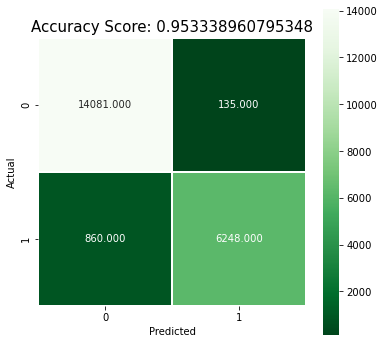

In [26]:
# Logistic regression model trained with hybrid SMOTE and undersampling
model_3, X_test_smote, y_test_smote = train_logistic_regression(X_smote, y_smote)
plot_confusion_matrix(model_3, X_test_smote, y_test_smote)

Accuracy: 0.9900845481868487
Precision: 0.1342534504391468
Recall: 0.8699186991869918
F1 Score: 0.2326086956521739


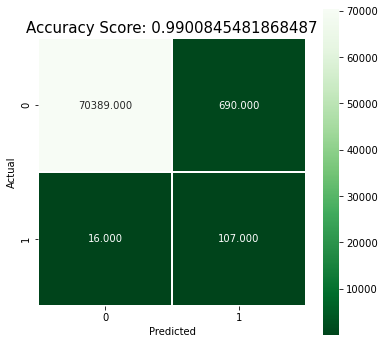

In [27]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_3, X_test_base, y_test_base)

### SMOTE again but with less oversampling and more undersampling

In [40]:
# This cell combines SMOTE oversampling of the minority class with undersampling of the majority class

oversample = SMOTE()
# synthetically upsample fraudulent cases to comprise 10% of dataset
over = SMOTE(sampling_strategy=0.005) # original proportion .0017
# random sampling to reduce majority class to 50% more than minority class
under = RandomUnderSampler(sampling_strategy=0.5)
smote_over_under = Pipeline([('over', over), ('under', under)])

X_smote_under, y_smote_under = smote_over_under.fit_resample(X_base, y_base)

Accuracy: 0.9371482176360225
Precision: 0.9931506849315068
Recall: 0.8169014084507042
F1 Score: 0.8964451313755796


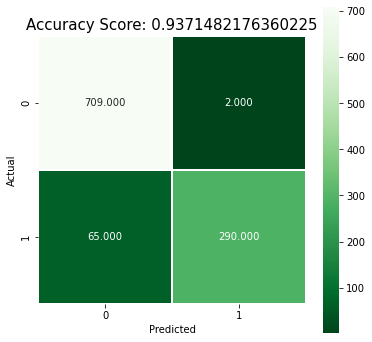

In [41]:
# Logistic regression model trained with hybrid SMOTE and undersampling
model_4, X_test_smote_under, y_test_smote_under = train_logistic_regression(X_smote_under, y_smote_under)
plot_confusion_matrix(model_4, X_test_smote_under, y_test_smote_under)

Accuracy: 0.9972472683351591
Precision: 0.36917562724014336
Recall: 0.8373983739837398
F1 Score: 0.5124378109452736


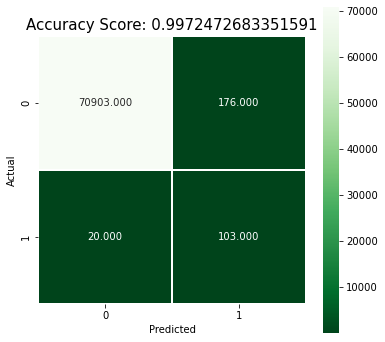

In [42]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_4, X_test_base, y_test_base)